In [1]:
# Task 2: 
#   1. Load required Libraries -------------------------------------------------------------------------      Done
#   2. load the dataset into a dataframe ---------------------------------------------------------------      Done
#   3. Explore the Data --------------------------------------------------------------------------------      Done
#   4. Clean the data ----------------------------------------------------------------------------------      Done
#   5. Use elbow method to determine the optimal number Clusters ---------------------------------------      Done
#   6. Implement K-Means Clustering Algorithm ----------------------------------------------------------      Done
#   7. Evaluate the clustering usin Silhouette ---------------------------------------------------------      Done
#   8. Tabulate your outcome ---------------------------------------------------------------------------      done - Report
#   9. Analyse the outcome of the different visuals at different number of clusters used ---------------      done - Report


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # for data standardization
from sklearn.metrics import silhouette_score
import os
os.environ['OMP_NUM_THREADS'] = '1'
%matplotlib inline

In [3]:
data = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [4]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
data.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


Drop the label since this is clustering task

In [6]:
data.drop('Class', inplace = True, axis = 1)

In [7]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [8]:
data.shape

(13611, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB


In [10]:
data.dtypes.value_counts() # gets the number of each data type in the dataset

float64    14
int64       2
dtype: int64

In [11]:
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

There are no missing values in the dataset

In [12]:
# Data scaling
X = data.iloc[:,0:15]
sc = StandardScaler()
X = sc.fit_transform(X)

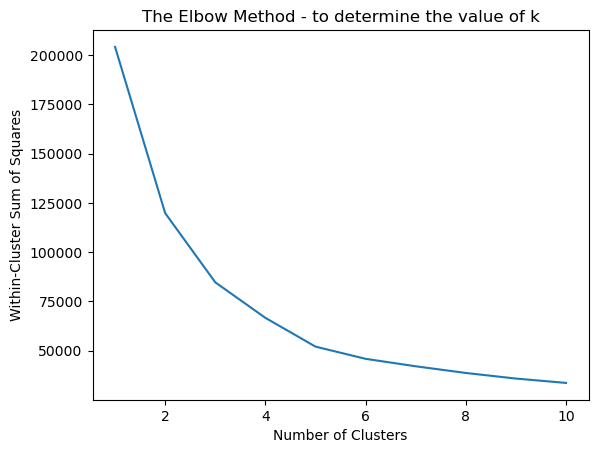

In [13]:
# Using the elbow method to find the optimal number of k

from sklearn.cluster import KMeans

wcss = []
i = 1

while i <= 10:
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init =10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    i += 1

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method - to determine the value of k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(X)  # predict the cluster setting k value to 4

The optimal number of clusters is 5 from the above elbow graph

In [15]:
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.57036593, 0.27940394])

In [16]:
print(X_reduced) # the reduced features after PCA tranformation

[[-4.88794643  1.93741494]
 [-5.3608473   3.09271966]
 [-4.64232679  1.92028229]
 ...
 [-1.36005718  0.14646788]
 [-1.1323173  -0.17667386]
 [-0.6431294  -0.70623638]]


The above codes reduced the dimension of the dataset using Principal Component Analysis(PCA) to two for ease of plot of the clusters 

In [17]:
percent_explained_variance =round(sum(pca.explained_variance_ratio_)*100, 2)
print(f'The percentage of the original variance explained by the new 2 dimensions: {percent_explained_variance}%')

The percentage of the original variance explained by the new 2 dimensions: 84.98%


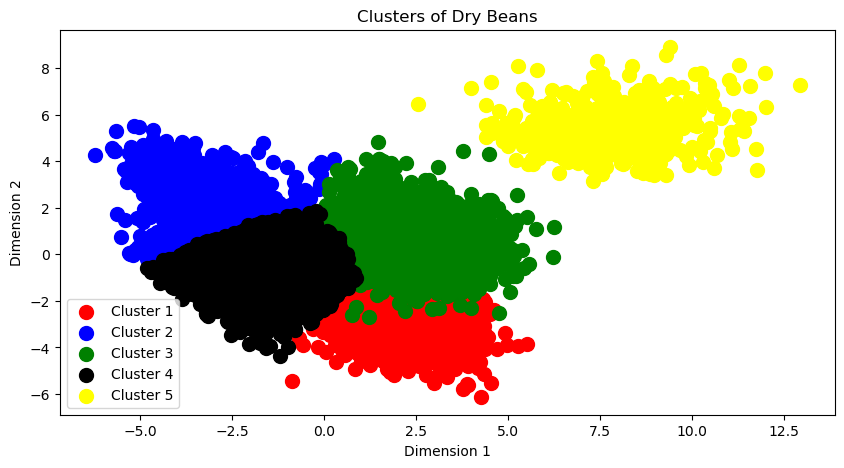

In [18]:
# Visualisation 
cluster_colours = ['red', 'blue', 'green', 'black', 'yellow']
plt.figure(figsize=(10, 5))

i = 0
while i < len(cluster_colours):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1], s=100, 
                c=cluster_colours[i], label='Cluster ' + str(i + 1))
     
    i += 1

plt.title('Clusters of Dry Beans')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [19]:
#Evaluation when number of clusters = 5
silhouette_avg = round(silhouette_score(X_reduced, y_kmeans),2)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.49


In [20]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init = 4, random_state = 42)
y_kmeans = kmeans.fit_predict(X)  # predict the cluster setting k value to 4

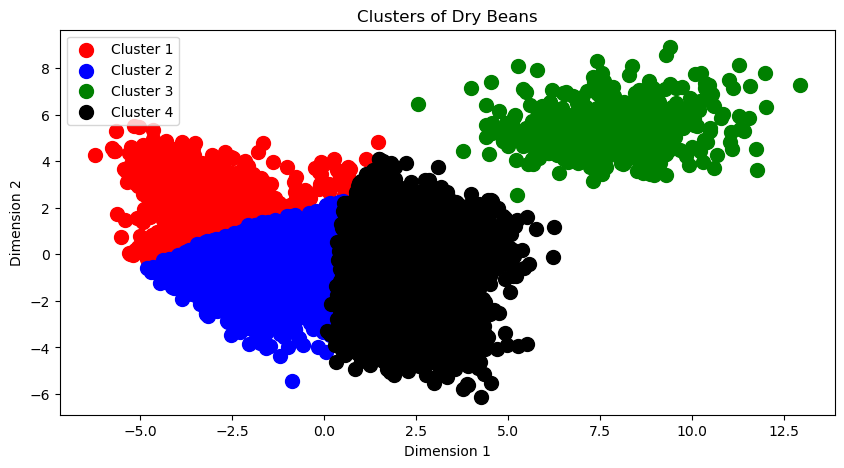

In [21]:
# Visualisation 
cluster_colours = ['red', 'blue', 'green', 'black']
plt.figure(figsize=(10, 5))

i = 0
while i < len(cluster_colours):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1], s=100, 
                c=cluster_colours[i], label='Cluster ' + str(i + 1))
     
    i += 1

plt.title('Clusters of Dry Beans')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [22]:
#Evaluation when number of clusters = 4
silhouette_avg = round(silhouette_score(X_reduced, y_kmeans),2)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.47


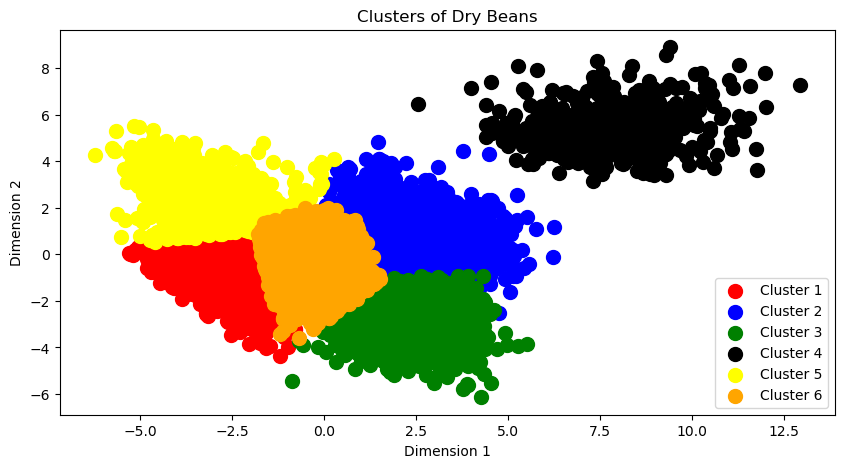

Silhouette Score: 0.46


In [23]:
# n_clusters = 6

kmeans = KMeans(n_clusters = 6, init = 'k-means++', n_init = 6, random_state = 42)
y_kmeans = kmeans.fit_predict(X)  # predict the cluster setting k value to 6

# Visualisation 
cluster_colours = ['red', 'blue', 'green', 'black', 'yellow', 'orange']
plt.figure(figsize=(10, 5))

i = 0
while i < len(cluster_colours):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1], s=100, 
                c=cluster_colours[i], label='Cluster ' + str(i + 1))
     
    i += 1

plt.title('Clusters of Dry Beans')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

#Evaluation when number of clusters = 6
silhouette_avg = round(silhouette_score(X_reduced, y_kmeans),2)
print(f"Silhouette Score: {silhouette_avg}")

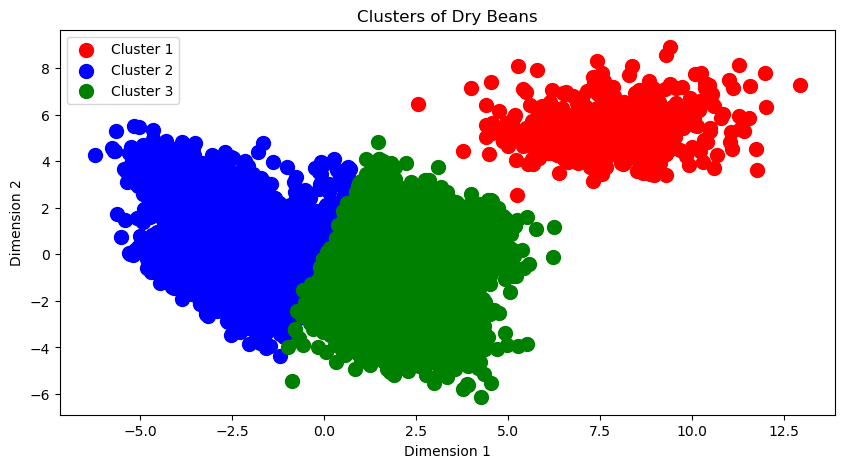

Silhouette Score: 0.49


In [24]:
# n_clusters = 3

kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(X)  # predict the cluster setting k value to 6

# Visualisation 
cluster_colours = ['red', 'blue', 'green']
plt.figure(figsize=(10, 5))

i = 0
while i < len(cluster_colours):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1], s=100, 
                c=cluster_colours[i], label='Cluster ' + str(i + 1))
     
    i += 1

plt.title('Clusters of Dry Beans')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

#Evaluation when number of clusters = 3
silhouette_avg = round(silhouette_score(X_reduced, y_kmeans),2)
print(f"Silhouette Score: {silhouette_avg}")

In [25]:
# Algorithm 2 for task 2: Hierarchical Clustering
#    1. Load required Libraries -------------------------------------------------------------------------      Done
#    2. Visualise the dendrogram to determine the number of clusters ------------------------------------      Done
#    3. Use AgglomerativeClustering to predict the clusters ---------------------------------------------      Done
#    4. Visualise the clusters---------------------------------------------------------------------------      Done
#    5. Evaluate the algorithm  using Silhouette --------------------------------------------------------      Done
#    6. Tabulate outcome --------------------------------------------------------------------------------      done - Report
#    7. Analyse the outcome of the different visuals at different number of clusters used ---------------      done - Report


In [26]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

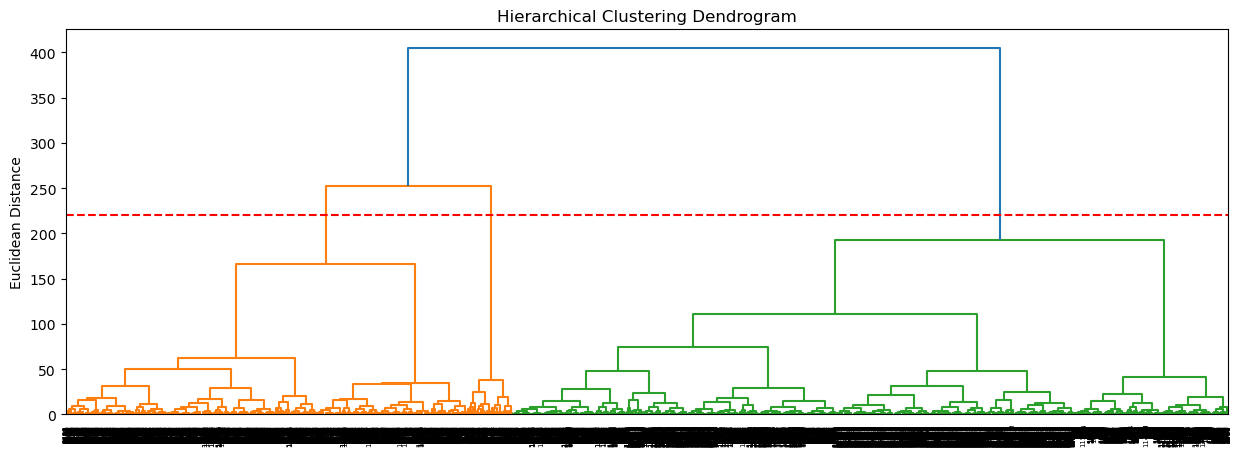

In [27]:
plt.figure(figsize = (15,5))
linked = linkage(X_reduced, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.axhline(y=220, c='red', linestyle='--')
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Euclidean Distance')
plt.show()

In [28]:
# Perform hierarchical clustering
agglomerative = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglomerative_labels = agglomerative.fit_predict(X_reduced)

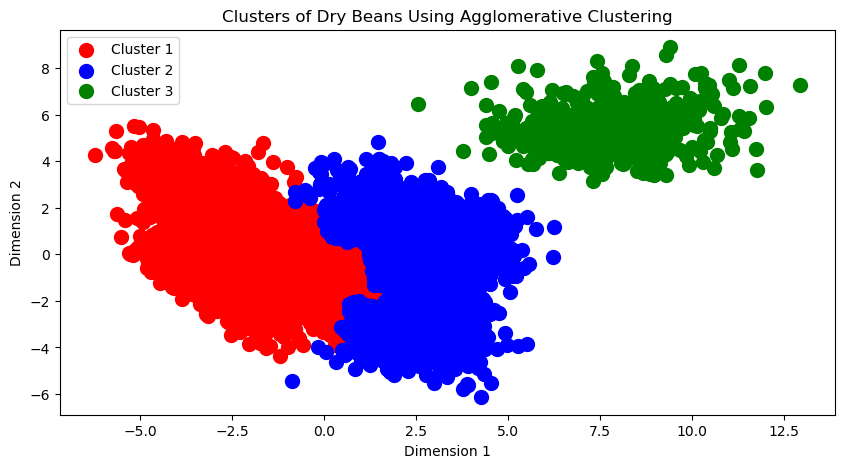

In [29]:
# Visualisation 
cluster_colours = ['red', 'blue', 'green']
plt.figure(figsize=(10, 5))

i = 0
while i < len(cluster_colours):
    plt.scatter(X_reduced[agglomerative_labels == i, 0], X_reduced[agglomerative_labels == i, 1], s=100, 
                c=cluster_colours[i], label='Cluster ' + str(i + 1))
    
    
    i += 1

plt.title('Clusters of Dry Beans Using Agglomerative Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [30]:
silhouette_avg = round(silhouette_score(X_reduced, agglomerative_labels),2)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.49


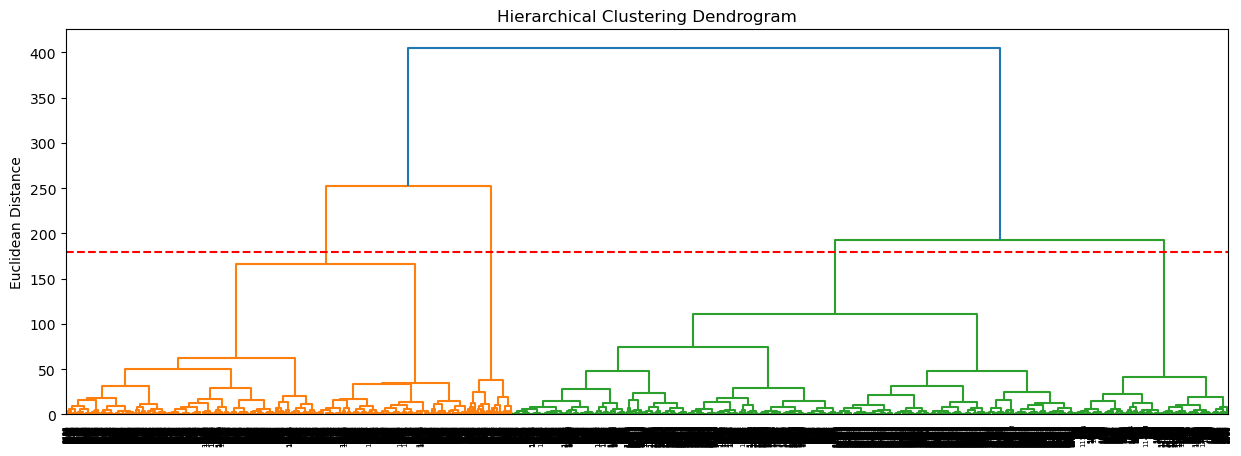

In [31]:
# When the number of clusters is increased to 4
plt.figure(figsize = (15,5))
linked = linkage(X_reduced, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.axhline(y=180, c='red', linestyle='--')
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Euclidean Distance')
plt.show()

In [32]:
# Perform hierarchical clustering when number of clusters = 4
agglomerative = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agglomerative_labels = agglomerative.fit_predict(X_reduced)

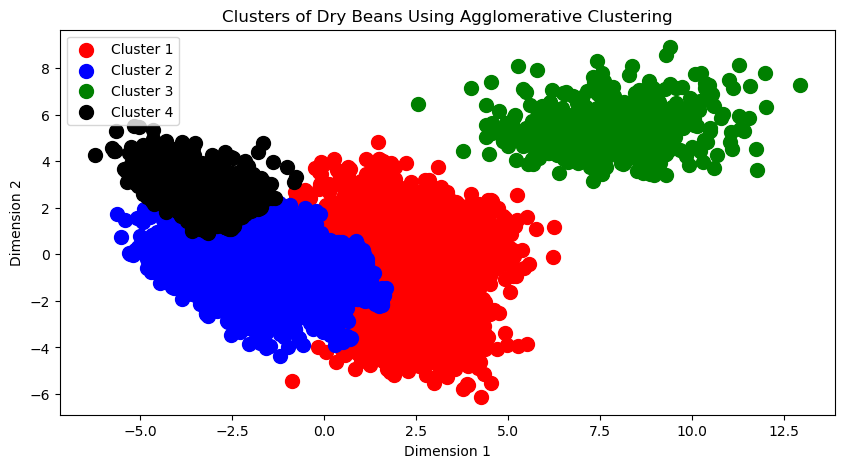

In [33]:
# Visualisation 
cluster_colours = ['red', 'blue', 'green', 'black']
plt.figure(figsize=(10, 5))

i = 0
while i < len(cluster_colours):
    plt.scatter(X_reduced[agglomerative_labels == i, 0], X_reduced[agglomerative_labels == i, 1], s=100, 
                c=cluster_colours[i], label='Cluster ' + str(i + 1))
    
    
    i += 1

plt.title('Clusters of Dry Beans Using Agglomerative Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [34]:
# Silhouette value when the cluster prediction is done using 4 clusters
silhouette_avg = round(silhouette_score(X_reduced, agglomerative_labels),2)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.45


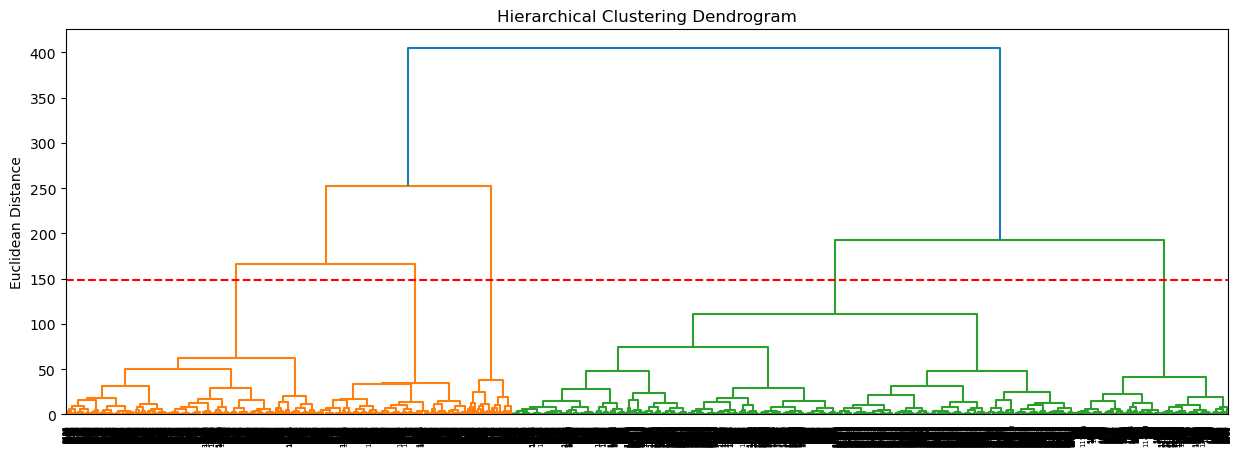

In [35]:
# When the number of clusters is increased to 5
plt.figure(figsize = (15,5))
linked = linkage(X_reduced, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.axhline(y=148, c='red', linestyle='--')
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Euclidean Distance')
plt.show()

In [36]:
# Perform hierarchical clustering when number of clusters = 5
agglomerative = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agglomerative_labels = agglomerative.fit_predict(X_reduced)

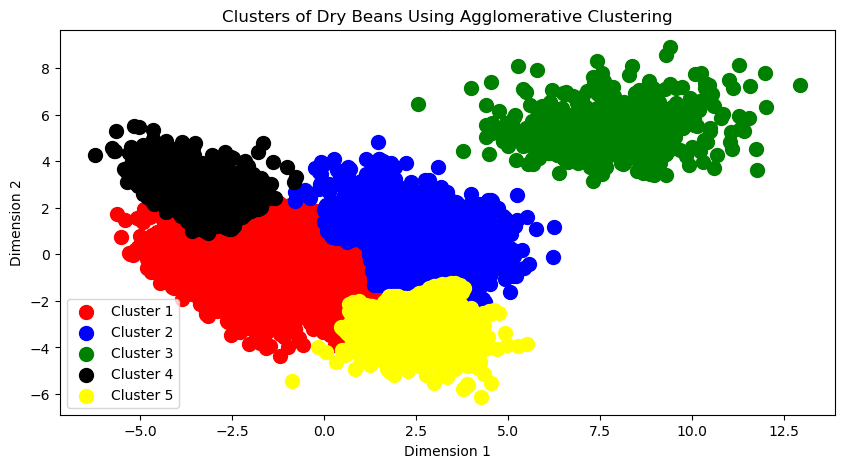

In [37]:
# Visualisation 
cluster_colours = ['red', 'blue', 'green', 'black', 'yellow']
plt.figure(figsize=(10, 5))

i = 0
while i < len(cluster_colours):
    plt.scatter(X_reduced[agglomerative_labels == i, 0], X_reduced[agglomerative_labels == i, 1], s=100, 
                c=cluster_colours[i], label='Cluster ' + str(i + 1))
    
    
    i += 1

plt.title('Clusters of Dry Beans Using Agglomerative Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [38]:
silhouette_avg = round(silhouette_score(X_reduced, agglomerative_labels),2)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.48


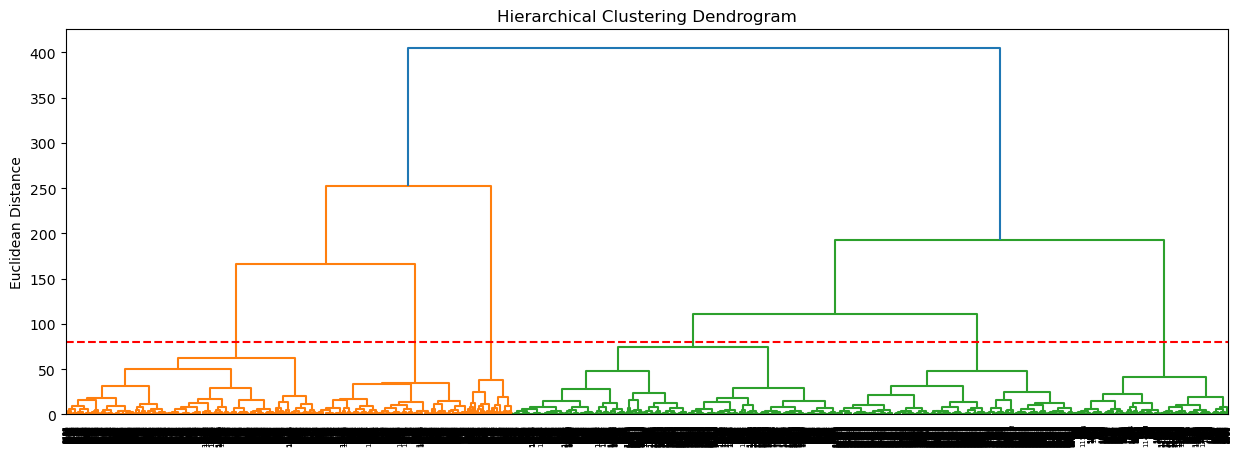

In [39]:
# When the number of clusters is increased to 6
plt.figure(figsize = (15,5))
linked = linkage(X_reduced, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.axhline(y=80, c='red', linestyle='--')
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Euclidean Distance')
plt.show()

In [40]:
# Perform hierarchical clustering when number of clusters = 6
agglomerative = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
agglomerative_labels = agglomerative.fit_predict(X_reduced)

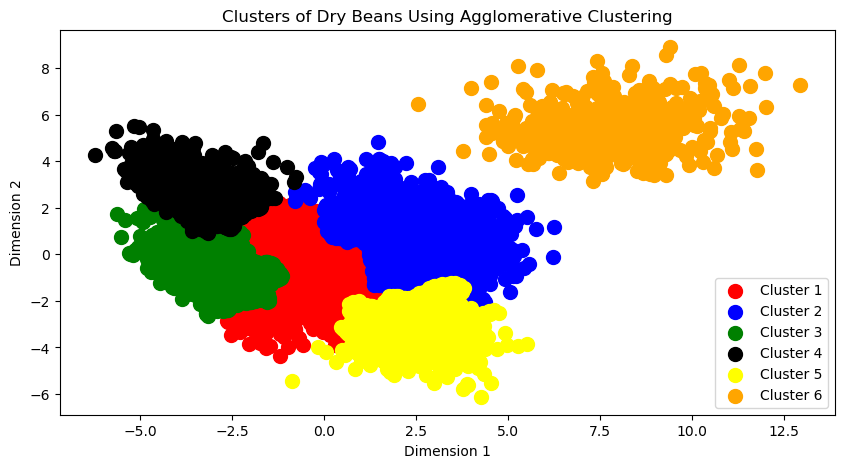

In [41]:
# Visualisation 
cluster_colours = ['red', 'blue', 'green', 'black', 'yellow', 'orange']
plt.figure(figsize=(10, 5))

i = 0
while i < len(cluster_colours):
    plt.scatter(X_reduced[agglomerative_labels == i, 0], X_reduced[agglomerative_labels == i, 1], s=100, 
                c=cluster_colours[i], label='Cluster ' + str(i + 1))
    
    
    i += 1

plt.title('Clusters of Dry Beans Using Agglomerative Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [42]:
silhouette_avg = round(silhouette_score(X_reduced, agglomerative_labels),2)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.43
